# Student Performance – Exploratory Data Analysis

This notebook explores the *StudentsPerformance* dataset:

- Understand the distribution of scores (math, reading, writing).
- Explore relationships between scores and:
  - Gender
  - Race/ethnicity
  - Parental level of education
  - Lunch type
  - Test preparation course
- Identify data quality issues (missing values, duplicates, dtypes).
- Derive basic insights useful for modeling and interpretation.



## Imports



In [1]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


### Load datasets

In [3]:
# Load the dataset
# Assumes this notebook sits in the same folder as StudentsPerformance.csv
df = pd.read_csv("StudentsPerformance.csv")

# Quick peek at the data
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Comment:
Loads data once and shows the first 5 rows so you can confirm columns and basic structure.

#### Basic structure and overviews

In [4]:
# Shape of the dataset: (rows, columns)
print("Shape:", df.shape)

# Column names
print("\nColumns:")
print(df.columns.tolist())


Shape: (1000, 8)

Columns:
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']


In [5]:
# Info: dtypes, non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
# Quick numeric summary of score columns
score_cols = ["math score", "reading score", "writing score"]
df[score_cols].describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Comment:
This tells you how many rows/columns you have, types of each column, and basic stats (min/mean/max) for score variables.

#### Data quality checks

#### Missing values

In [7]:
# Check missing values per column
df.isna().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

If everything is 0, you can note “No missing values in this dataset”.

#### Duplicates

In [8]:
# Check for duplicated rows
df.duplicated().sum()


np.int64(0)

Comment:
If this is 0, no duplicate rows. If not, you can decide whether to drop them.

### Unique values (categorical coverage)

In [9]:
# Number of unique values per column
df.nunique()


gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

Comment:
Helps understand cardinality of categorical columns and scores (e.g., are scores discrete / continuous-like?).

#### Feature engineering for EDA

We won’t use these in the final model pipeline, but they’re very useful for interpretation.

In [10]:
# Create total and average score per student (row-wise)
df["total score"] = (
    df["math score"] + df["reading score"] + df["writing score"]
)
df["average score"] = df["total score"] / 3

# Quick check
df[["math score", "reading score", "writing score", "total score", "average score"]].head()


,math score,reading score,writing score,total score,average score
0,72,72,74,218,72.666667
1,69,90,88,247,82.333333
2,90,95,93,278,92.666667
3,47,57,44,148,49.333333
4,76,78,75,229,76.333333


Comment:
This lets you analyze “overall performance” in addition to individual subjects.
(We avoid using statistics.mean here; vectorized division is correct.)

### Univariate analysis (scores)


#### Distributions of scores

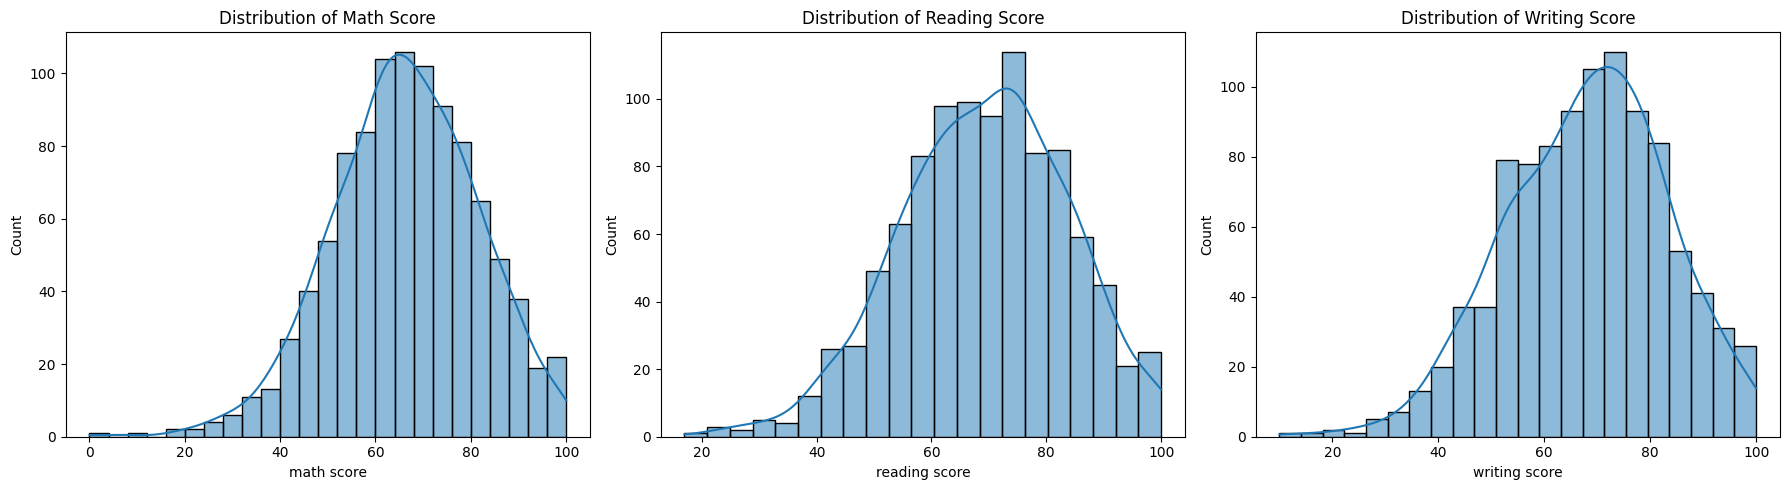

In [11]:
# Histograms + KDE for individual scores
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, col in zip(axes, score_cols):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f"Distribution of {col.title()}")

plt.tight_layout()
plt.show()


#### Distribution of average score

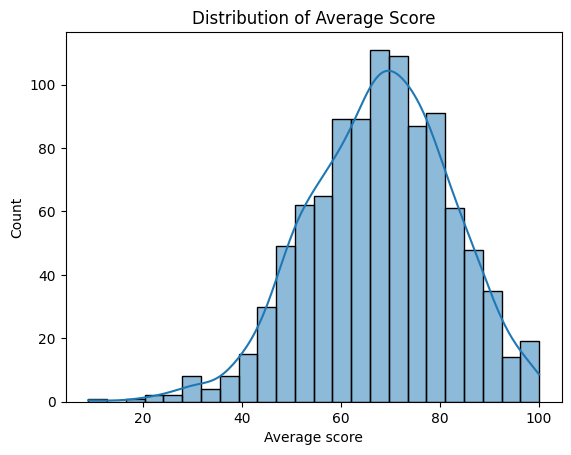

In [12]:
sns.histplot(df["average score"], kde=True)
plt.title("Distribution of Average Score")
plt.xlabel("Average score")
plt.show()


#### Boxplots for outlier detection

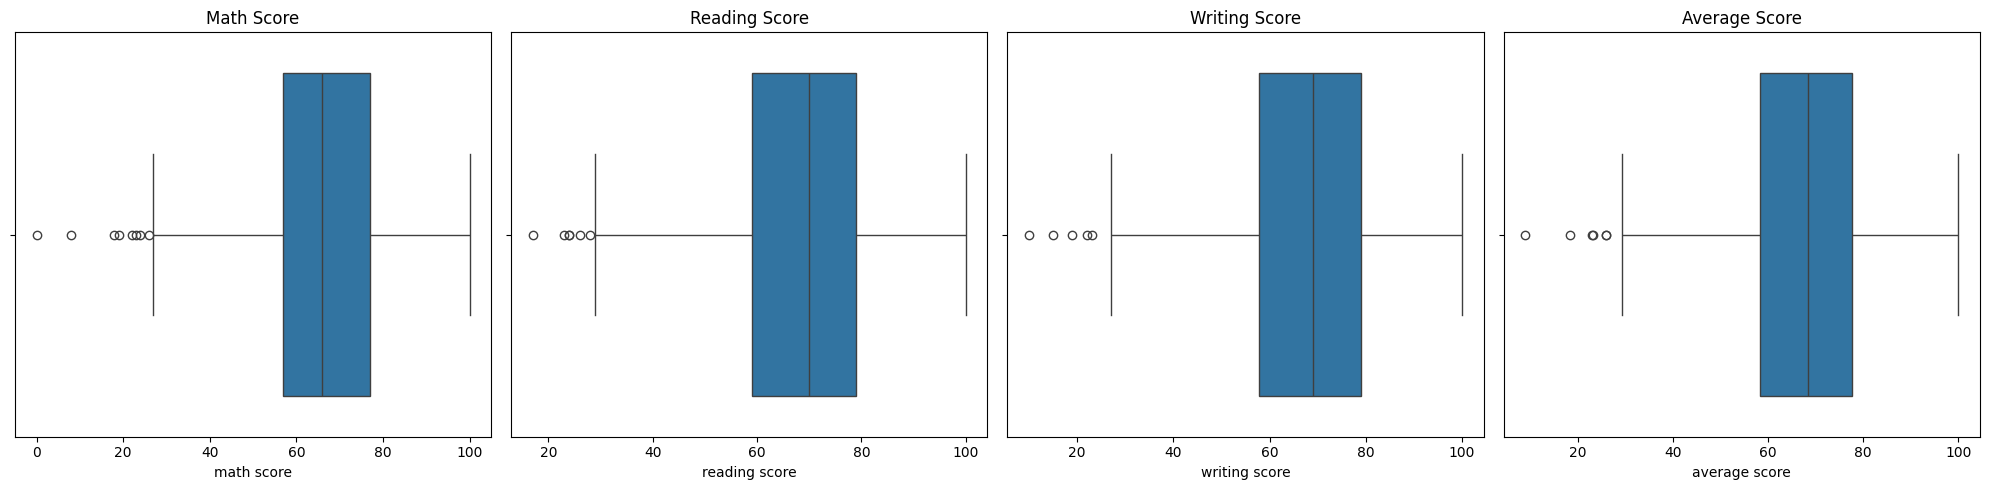

In [13]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for ax, col in zip(axes, ["math score", "reading score", "writing score", "average score"]):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(col.title())

plt.tight_layout()
plt.show()


Comment:
Gives you a good idea of central tendency, spread, and potential outliers for each score.

#### Categorical variables overview

Value counts for each categorical feature

In [14]:
categorical_cols = [
    "gender",
    "race/ethnicity",
    "parental level of education",
    "lunch",
    "test preparation course",
]

for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())



Column: gender
gender
female    518
male      482
Name: count, dtype: int64

Column: race/ethnicity
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

Column: parental level of education
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

Column: lunch
lunch
standard        645
free/reduced    355
Name: count, dtype: int64

Column: test preparation course
test preparation course
none         642
completed    358
Name: count, dtype: int64


#### Countplots

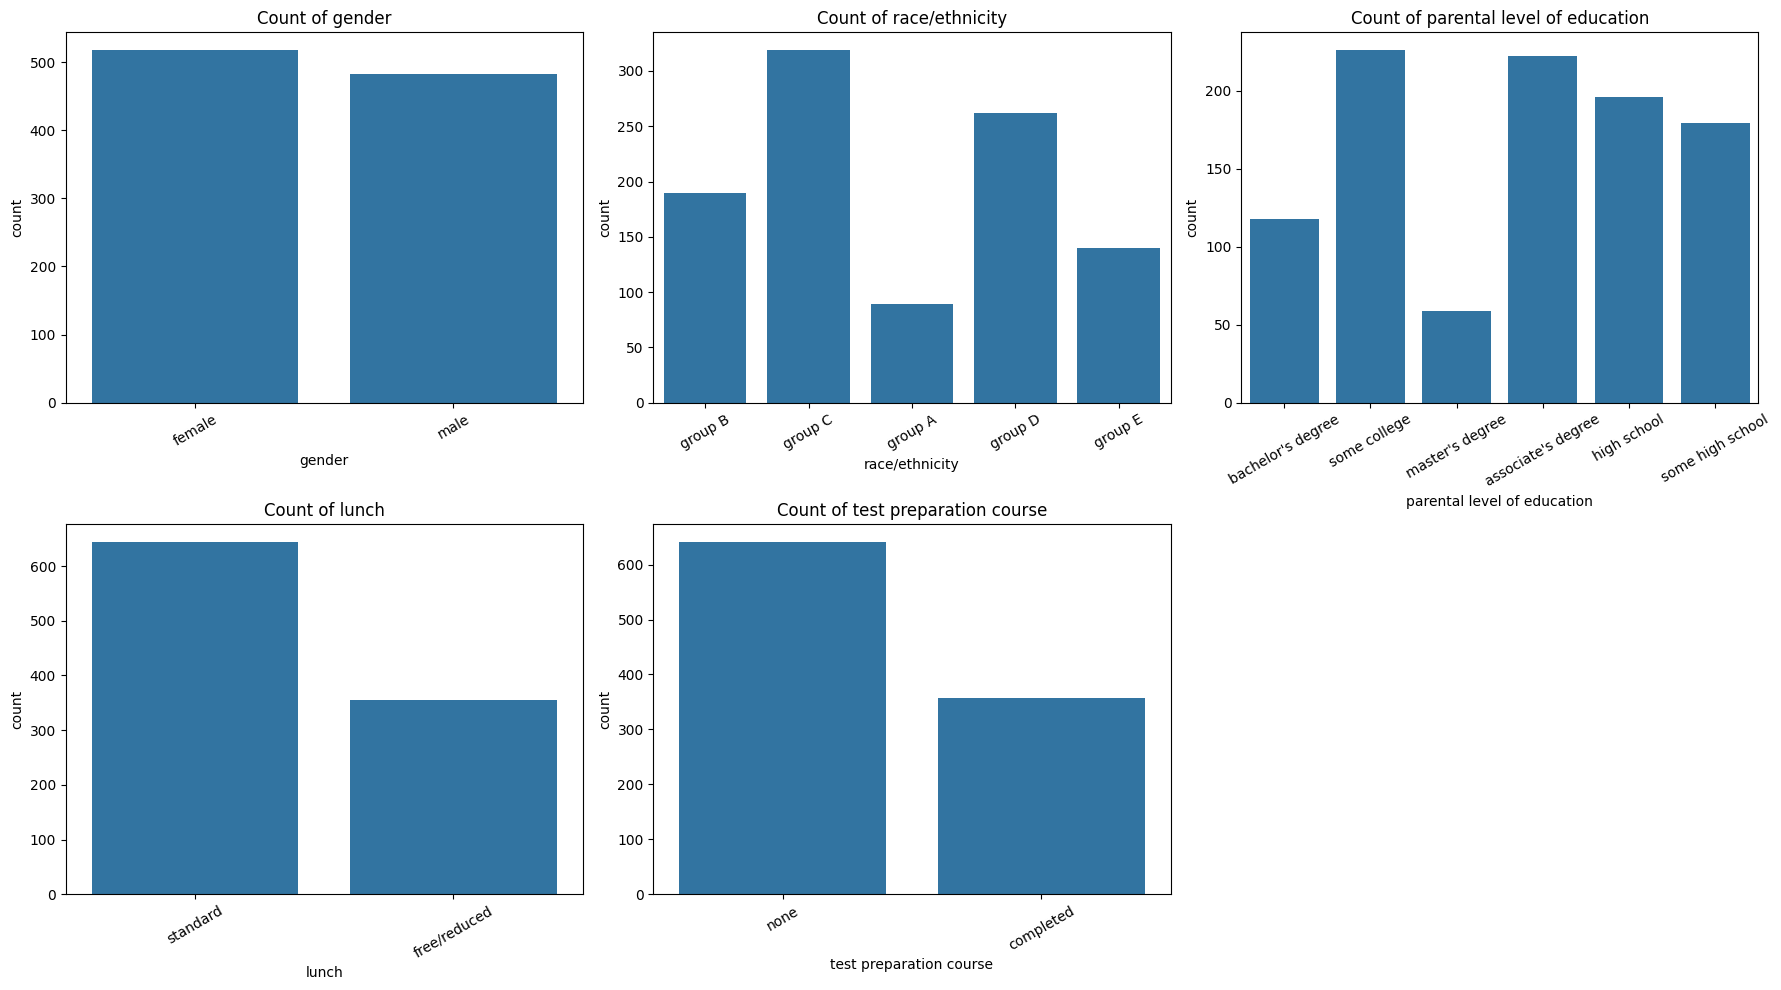

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for ax, col in zip(axes, categorical_cols):
    sns.countplot(x=df[col], ax=ax)
    ax.set_title(f"Count of {col}")
    ax.tick_params(axis="x", rotation=30)

# Hide any unused subplots (if number of categories < 6)
for i in range(len(categorical_cols), len(axes)):
    axes[i].axis("off")

plt.tight_layout()
plt.show()


Comment:
These plots replace many separate count/pie charts you had before, in a compact and clear way.

### Relationship between categorical features and scores

We care most about how math score (our target) varies across groups.

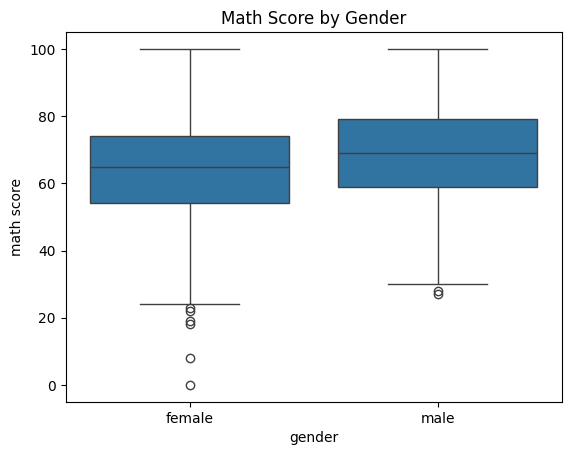

In [16]:
sns.boxplot(x="gender", y="math score", data=df)
plt.title("Math Score by Gender")
plt.show()


### Math score by race/ethnicity

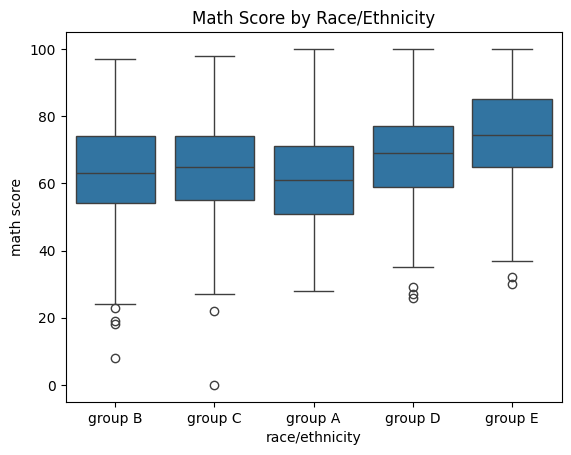

In [17]:
sns.boxplot(x="race/ethnicity", y="math score", data=df)
plt.title("Math Score by Race/Ethnicity")
plt.show()


#### Math score by parental education

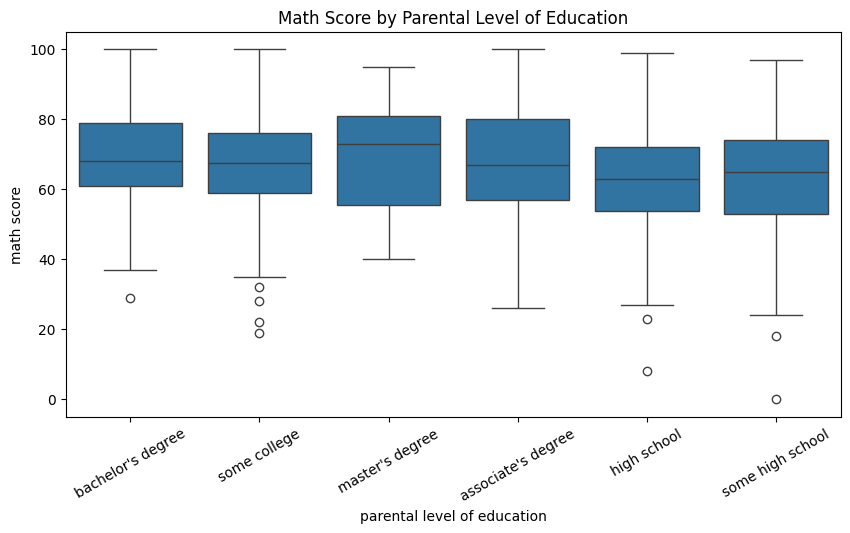

In [18]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    x="parental level of education",
    y="math score",
    data=df,
)
plt.title("Math Score by Parental Level of Education")
plt.xticks(rotation=30)
plt.show()


#### Math score by lunch type

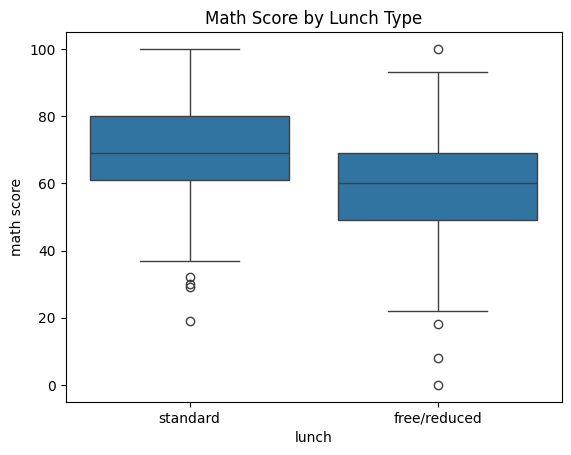

In [19]:
sns.boxplot(x="lunch", y="math score", data=df)
plt.title("Math Score by Lunch Type")
plt.show()


#### Math score by test preparation course

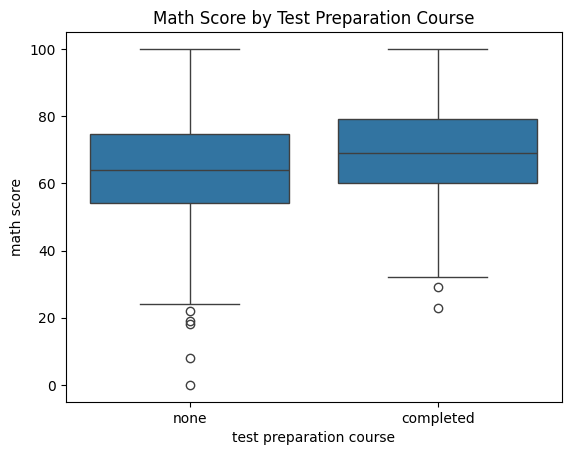

In [20]:
sns.boxplot(x="test preparation course", y="math score", data=df)
plt.title("Math Score by Test Preparation Course")
plt.show()


Comment:
These plots replace multiple repetitive histogram/pair plots by focusing on target vs feature directly — more aligned with modeling.

#### Correlation analysis between numeric features

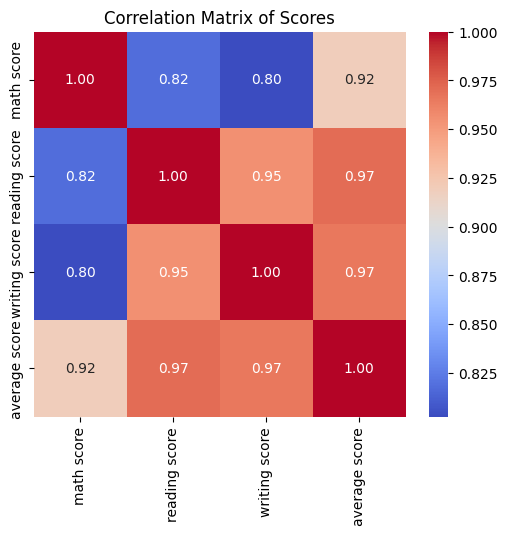

In [21]:
numeric_df = df[["math score", "reading score", "writing score", "average score"]]

corr = numeric_df.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Scores")
plt.show()


Comment:
This makes it clear how strongly math score relates to reading, writing, and the derived average.

## Conclusions

- **Data quality**
  - No missing values and no duplicate rows (for this dataset).
  - Score columns are numeric and well-behaved.

- **Performance distribution**
  - Math, reading, and writing scores are roughly bell-shaped with some spread.
  - Average score is similarly distributed, with most students in a mid-range band.

- **Relationships**
  - Scores are highly correlated with each other (reading, writing, and math move together).
  - Gender, race/ethnicity, parental education, and lunch type all show differences in average math score.
  - Test preparation course has a noticeable but smaller effect on math scores.

- **Implication for modeling**
  - Good target choice: **math score**.
  - Useful predictors:
    - Categorical: gender, race/ethnicity, parental level of education, lunch, test preparation course.
    - Numeric: reading score, writing score.
  - Strong relationships and clean data justify moving on to feature engineering and model training.
